# Tarea 3
## Análisis de Datos
## Ana Isabel Moreno Hernández 
## NUA: 434232

# **Visualization with Matplotlib**

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Antes que nada, descargamos algunos conjuntos de datos para emplearlos en esta tarea-

In [2]:
# Tasas de años
url = 'https://www.indexmundi.com/map/?t=0&v=25&r=xx&1=en'
html = requests.get(url).content
Birth_rate = pd.read_html(html)[2]
Birth_rate.head()

,Country,"Birth rate (births/1,000 population)",Year
0,Angola,44,2017
1,Niger,44,2017
2,Mali,44,2017
3,Uganda,43,2017
4,Zambia,42,2017


In [3]:
# Tasa de desempleo 
url = 'https://www.indexmundi.com/map/?t=0&v=74&r=xx&l=en'
html = requests.get(url).content
unemployement = pd.read_html(html)[2]
unemployement.head()

,Country,Unemployment rate (%),Year
0,Zimbabwe,95,2009
1,Burkina Faso,77,2004
2,Djibouti,60,2014
3,Syria,50,2017
4,Senegal,48,2007


In [4]:
# Número de manchas solares por año
anios = []
manchas = []
for i in range(5):
    sunspots = np.loadtxt('sunspots.txt', dtype=[('anio',int),('Numero',float)], usecols = (i*2,i*2+1), unpack = True)
    anios = np.concatenate((anios,sunspots[0]),axis=0)
    manchas = np.concatenate((manchas,sunspots[1]),axis=0)

In [5]:
# Datos de temperatura y precipitación
temp_minima_2019 = pd.read_csv('temp_minima_2019.csv', encoding='latin-1')
temp_media_2019 = pd.read_csv('temp_media_2019.csv', encoding='latin-1')
temp_maxima_2019 = pd.read_csv('temp_maxima_2019.csv', encoding='latin-1')
lluvias_2019 = pd.read_csv('lluvias_2019.csv', encoding='latin-1')

temp_minima_2018 = pd.read_csv('temp_minima_2018.csv',encoding='latin-1')
temp_media_2018 = pd.read_csv('temp_media_2018.csv',encoding='latin-1')
temp_maxima_2018 = pd.read_csv('temp_maxima_2018.csv',encoding='latin-1')
lluvias_2018 = pd.read_csv('lluvias_2018.csv',encoding='latin-1')

In [6]:
temp_minima_2018.head()

,Lon,Lat,Clave,Edo,Est,Tmin
0,-101.51,20.43,ABSGJ,GTO,ABASOLO,7.5
1,-98.38,24.06,ABSTP,TAMPS,ABASOLO,7.9
2,-116.90,32.44,ALRBN,BC,ABELARDO L. RODRIGUEZ,10.2
3,-97.97,20.17,ACJPB,PUE,ACAJETE *,2.4
4,-92.80,16.55,ACACP,CHIS,ACALA,13.9


## **Simple line plots**

Empezamos creando una figura y ejes:

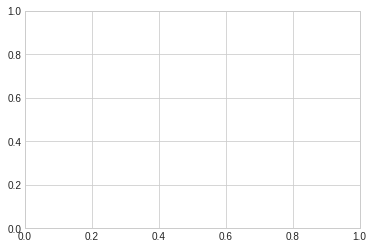

In [7]:
fig = plt.figure()
ax = plt.axes()

Donde figure pertenece a la clase Figure y axes a la clase Axes. Figure crea la gráfica, el texto y los ejes, mientras que Axes crea el canvas.

Plot sirve para graficar y mostrar un conjunto de datos.

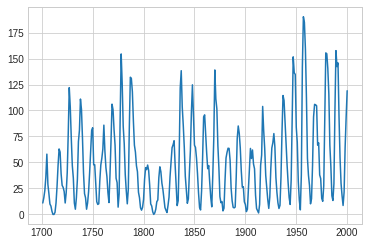

In [8]:
# Graficamos las manchas solares contra el año
fig = plt.figure()
ax = plt.axes()
ax.plot(anios, manchas);

Plt.plot hace lo mismo.

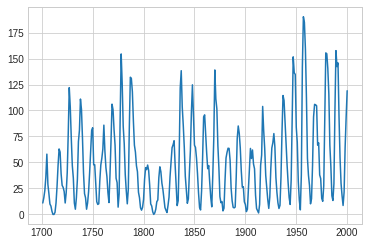

In [9]:
plt.plot(anios,manchas);

Para crear una figura con múltiples conjuntos de datos.

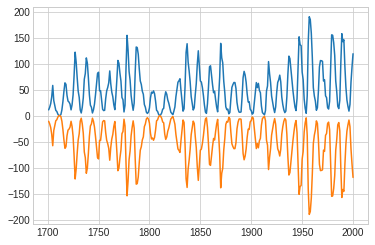

In [10]:
plt.plot(anios, manchas)
plt.plot(anios, manchas-2*manchas)

Para modificar colores y estilos.

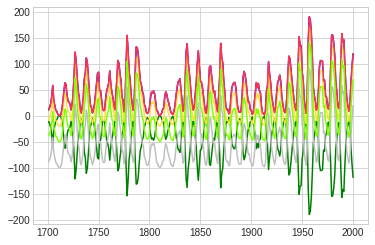

In [11]:
plt.plot(anios, manchas, color='blue')        # Con el nombre específico del color
plt.plot(anios, -1*manchas, color='g')           # Con el modo corto del color
plt.plot(anios, manchas-100, color='0.75')        # Escala de grises entre 0 a 1
plt.plot(anios, manchas-20, color='#FFDD44')     # Código hexadecimal
plt.plot(anios, manchas, color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(anios, manchas-50, color='chartreuse'); # all HTML color names supported

Y para ajustar el estilo de la línea. 

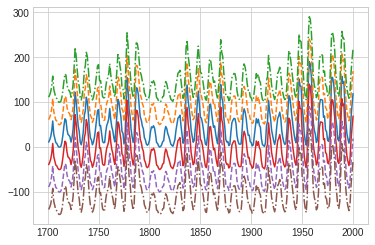

In [12]:
plt.plot(anios, manchas, linestyle='solid')        # Línea continua
plt.plot(anios, manchas+50, linestyle='dashed')    # Línea con rayas -       
plt.plot(anios, manchas+100, linestyle='dashdot'); # Línea con rayas y puntos

plt.plot(anios, manchas-50, linestyle='-')    
plt.plot(anios, manchas-100, linestyle='--') 
plt.plot(anios, manchas-150, linestyle='-.');

Y finalmente, para modificar estilos de líneas y colores:

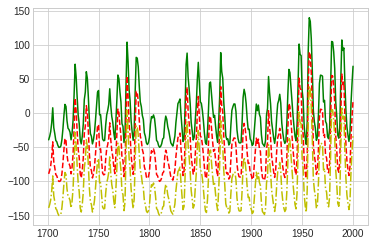

In [13]:
plt.plot(anios, manchas-50, 'g-')    
plt.plot(anios, manchas-100, 'r--') 
plt.plot(anios, manchas-150, 'y-.');

Luego, para modificar los límites de los ejes utilizamos plt.xlim y plt.ylim.

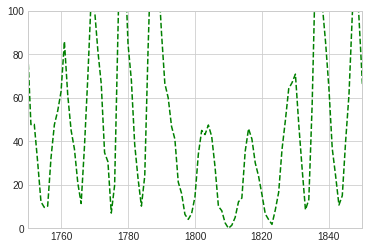

In [14]:
plt.plot(anios, manchas, 'g--')

plt.xlim(1750, 1850)
plt.ylim(0, 100);

Y lo mismo puede hacerse con plt.axis.

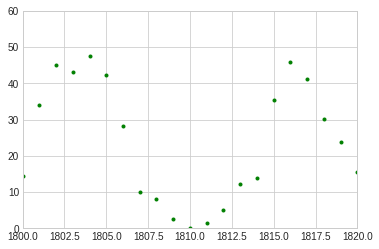

In [15]:
plt.plot(anios, manchas, 'g.')
plt.axis([1800, 1820, 0, 60]);

Con axis('tight') podemos ajustar el canvas a la gráfica.

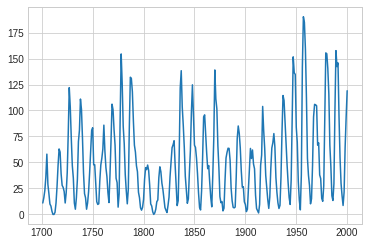

In [16]:
plt.plot(anios, manchas)
plt.axis('tight');

Incluso axis permite observar en la gráfica sólo una fracción igualitaria de x y de y

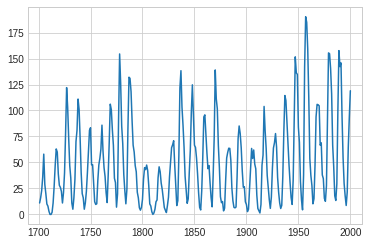

In [17]:
plt.plot(anios, manchas)
plt.axis('equal');

Finalmente, para poner títulos en las gráficas, en los ejes y leyendas, existen diversas formas de hacerlo.

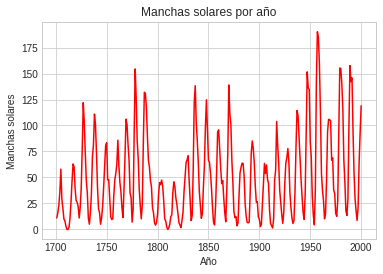

In [18]:
plt.plot(anios, manchas, 'red')
plt.title("Manchas solares por año")
plt.xlabel("Año")
plt.ylabel("Manchas solares");

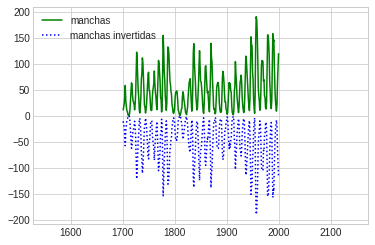

In [19]:
plt.plot(anios, manchas, '-g', label='manchas')
plt.plot(anios, -manchas, ':b', label='manchas invertidas')
plt.axis('equal')

plt.legend();

Y con la clase Axes obtenemos cosas similares.

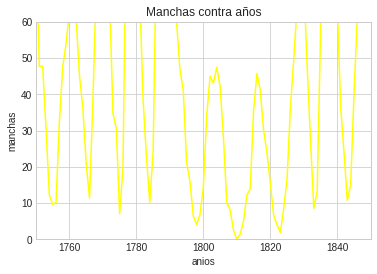

In [20]:
ax = plt.axes()
ax.plot(anios, manchas, 'yellow')
ax.set(xlim=(1750, 1850), ylim=(0, 60),
       xlabel='anios', ylabel='manchas',
       title='Manchas contra años');

## **Simple Scatter Plots**

Si bien en la sección anterior aprendimos a crear gráficos con plt.plot. Un ejemplo de esto es lo siguiente:

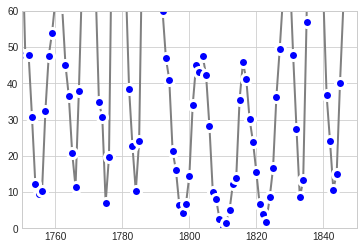

In [21]:
plt.plot(anios, manchas, '-o', color='gray',
         markersize=10, linewidth=2,
         markerfacecolor='blue',
         markeredgecolor='white',
         markeredgewidth=3)
plt.xlim(1750,1850)
plt.ylim(0, 60);

Con plt.scatter podemos crear gráficos también. Las ventajas de scatter es que podemos modificar las propiedades de cada dato. En el siguiente ejemplo vuelve a graficarse manchas solares contra años, pero modificando aleatoriamente tamaño, color y estilo de los puntos.

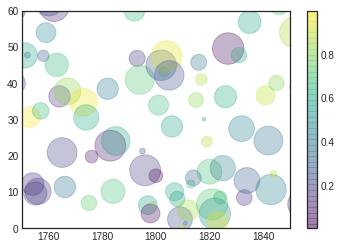

In [94]:
rng = np.random.RandomState(0)
colors = rng.rand(len(anios))
sizes = 1000 * rng.rand(len(anios))
plt.scatter(anios, manchas, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.xlim(1750,1850)
plt.ylim(0, 60);
plt.colorbar(); #Para mostrar la escala de colores

## **Visualizing Errors**

En matplotlib pueden generarse gráficas con barras de error. En el siguiente ejemplo se muestra el código para graficar manchas solares contra años, con una incertidumbre igual a 30 en todas.

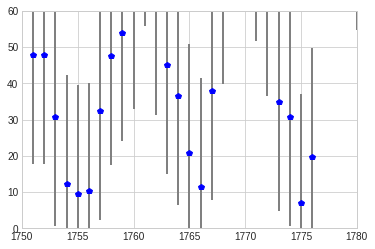

In [23]:
dy = 30
plt.errorbar(anios, manchas, yerr=dy, fmt='p', color='blue',
             ecolor='gray', elinewidth=2, capsize=0); # Decido que sean pentágonos azules con barras de color gris
plt.ylim(0,60)
plt.xlim(1750,1780);

Y para poner errores en la variable x basta con utilizar xerr, donde incluso xerr puede ser un array.

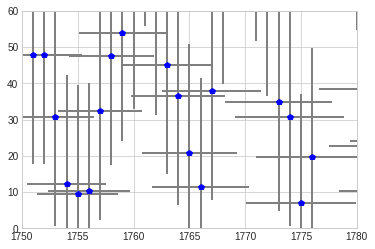

In [24]:
dy = 30
dx = np.linspace(0,20,len(anios))
plt.errorbar(anios, manchas, xerr = dx,yerr=dy, fmt='p', color='blue',
             ecolor='gray', elinewidth=2, capsize=0); # Decido que sean pentágonos azules con barras de color gris
plt.ylim(0,60)
plt.xlim(1750,1780);

## **Density and Contour Plots**

In [25]:
plt.style.use('seaborn-white')

En matplotlib pueden crearse gráficas de 3 dimensiones y una de las más importantes vistas es el contour, ya que es donde podemos observar la distribución de los datos en dos dimensiones. 

plt.contour toma una cuadrícula de x, una de y y una z. x y y representan posiciones y los valores de z son representados por los niveles de contour.

meshgrid genera cuadrículas de dos dimensiones de un arreglo de una dimensión.

En el siguiente código, se hará una gráfica de 3 dimensiones donde 'x' será la longitud, 'y' la latitud y 'z' será la temperatura en 'x'. Claro está que esto será tomando los datos de temperaturas anteriormente guardados. Cabe mencionar que sólo se observará la temperatura en la longitud tal, no sé observará con qué latitud es.

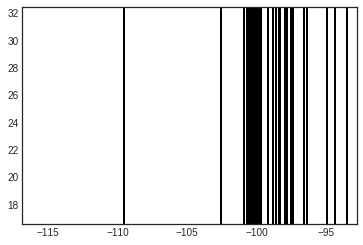

In [120]:
x = temp_media_2018['Lon'][0:20]
y = temp_media_2018['Lat'][0:20]

X, Y = np.meshgrid(x, y)
Z, W = np.meshgrid(temp_media_2018['Tmed'][0:20],x) #Para generar un grid en Z, W es para guardar el otro arreglo

plt.contour(X, Y, Z, colors='black');

Y por colores, pueden observarse las zonas donde la temperatura es mayor.

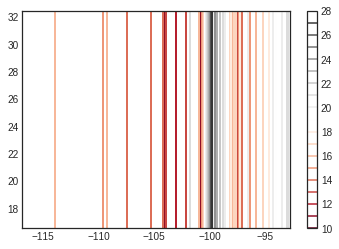

In [121]:
plt.contour(X, Y, Z, 20, cmap='RdGy'); #cmap sirve para poner colores, 20 es el número de líneas de color
# RdGy es por Red-Gray colormap. Así es la escala de colores, del rojo al gris.
plt.colorbar();

Si los espacios de las líneas no nos permiten ver con más claridad, utilizamos plt.contourf, que es lo mismo que plt.contour()

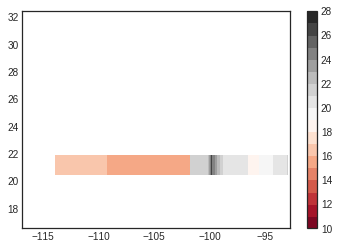

In [122]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

Luego, para ver los colores de una forma más continua utilizamos imshow. Es importante mencionar que imshow no acepta cuadriculados de arrays, sólo toma rangos de valores de x y de y, y ajustará estos rangos al cuadriculado Z.

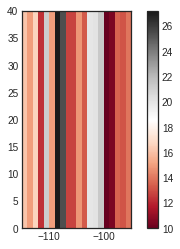

In [134]:
plt.imshow(Z, extent=[-115, -95, 0, 40], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

Finalmente, para combinar plt.imshow y contours. En el siguiente ejemplo se muestran los dos en una sola gráfica, además de que se muestran los valores de las temperaturas en cada valor de x.

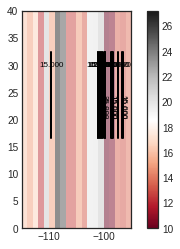

In [135]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[-115, -95, 0, 40], origin='lower',
           cmap='RdGy', alpha=1.5) # Alpha indica la transparencia
plt.colorbar();

## **Histograms, Binnings, and Density**